# 数据总览

In [123]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [124]:
# 观察前几行的数据
train_data = pd.read_csv("Tick_train.csv")
test_data = pd.read_csv("Tick_test.csv")

sns.set_style("whitegrid")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
#  数据信息的总览和细节
train_data.info()
print("--------------------")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare        

从上面我们可以看出，Age、Cabin、Embarked、Fare几个特征存在缺失值。

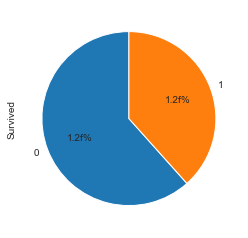

In [126]:
#绘制出存活比例
train_data["Survived"].value_counts().plot.pie(labeldistance=1.1, autopct="1.2f%%",
                                              shadow=False, startangle=90, pctdistance=0.6)
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

# 缺失值的处理办法

对数据进行分析的时候要注意其中是否有缺失值。一些机器学习算法能够处理缺失值，比如神经网络，一些则不能。
对于缺失值，一般有以下几种处理方法:

1.如果数据集很多，但有很少的缺失值，可以删掉带缺失值的行；
2.如果该属性相对学习来说不是很重要，可以对缺失值赋均值或者众数。
3.对于标称属性，可以赋一个代表缺失的值，比如‘U0’。因为缺失本身也可能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱。

In [127]:
#  比若说 Embarked在哪上的船  则可以用众数 进行填充
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values
train_data["Cabin"] = train_data.Cabin.fillna("U0")

In [128]:
train_data.Embarked.isna().sum()

0

使用回归 随机森林等模型来预测缺失属性的值。因为Age在该数据集里是一个相当重要的特征（先对Age进行分析即可得知），所以保证一定的缺失值填充准确率是非常重要的，对结果也会产生较大影响。一般情况下，会使用数据完整的条目作为模型的训练集，以此来预测缺失值。对于当前的这个数据，可以使用随机森林来预测也可以使用线性回归预测。这里使用随机森林预测模型，选取数据集中的数值属性作为特征（因为sklearn的模型只能处理数值属性，所以这里先仅选取数值特征，但在实际的应用中需要将非数值特征转换为数值特征）

In [129]:
from sklearn.ensemble import RandomForestRegressor

age_df = train_data[["Age","Survived","Fare","Parch","SibSp","Pclass"]]
age_df_notnull = age_df.loc[(train_data["Age"].notnull())]
age_df_isnull = age_df.loc[(train_data["Age"].isnull())]
age_df_notnull.head()

,Age,Survived,Fare,Parch,SibSp,Pclass
0,22.0,0,7.2500,0,1,3
1,38.0,1,71.2833,0,1,1
2,26.0,1,7.9250,0,0,3
3,35.0,1,53.1000,0,1,1
4,35.0,0,8.0500,0,0,3


In [130]:
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
X[:2]  
# X.head()  numpy.ndarray' object has no attribute 'head'

array([[ 0.    ,  7.25  ,  0.    ,  1.    ,  3.    ],
       [ 1.    , 71.2833,  0.    ,  1.    ,  1.    ]])

In [131]:
#  用随机森林来处理年龄的缺失值
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X, Y)
predictAges = RFR.predict(age_df_isnull.values[:, 1:])
predictAges[:3]

array([24.47808384, 33.48895453, 18.43516667])

In [132]:
#  就是 找出 train_data 中 年龄的缺失值所在的行， 和所在的列
train_data.loc[train_data["Age"].isnull(), ["Age"]] = predictAges

让我们再来看一下缺失数据处理后的DataFram：

In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 分析数据之间的关系

##  性别与是否存活之间的关系， Sex

In [134]:
print(train_data.groupby(["Sex","Survived"])["Survived"].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [135]:
train_data[["Sex","Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [136]:
train_data.groupby(["Sex","Survived"])["Sex"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

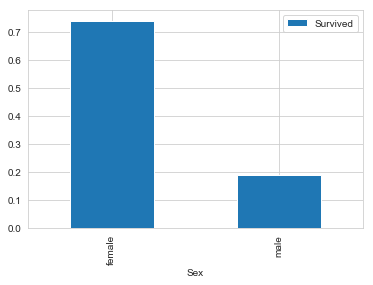

In [137]:
train_data[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar()

## 船舱等级和生存与否的关系  Pclass

In [138]:
print(train_data.groupby(["Pclass","Survived"])["Pclass"].count())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64


In [139]:
train_data[["Pclass","Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


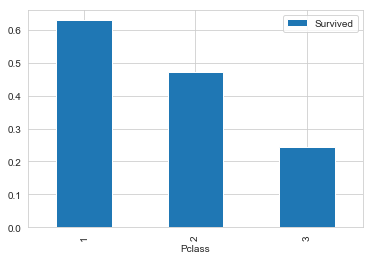

In [140]:
train_data[["Pclass","Survived"]].groupby(["Pclass"]).mean().plot.bar()

不同等级船舱的男女生存率

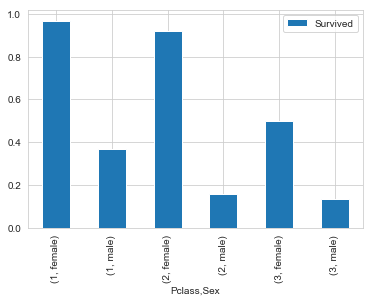

In [141]:
train_data[["Sex","Pclass","Survived"]].groupby(["Pclass","Sex"]).mean().plot.bar()

In [142]:
print(train_data.groupby(["Sex","Pclass","Survived"])["Survived"].count())

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64


## 年龄和存活与否之间的关系  Age

分别分析不同的等级船舱和不同的性别下的年龄分布和生存之间的关系

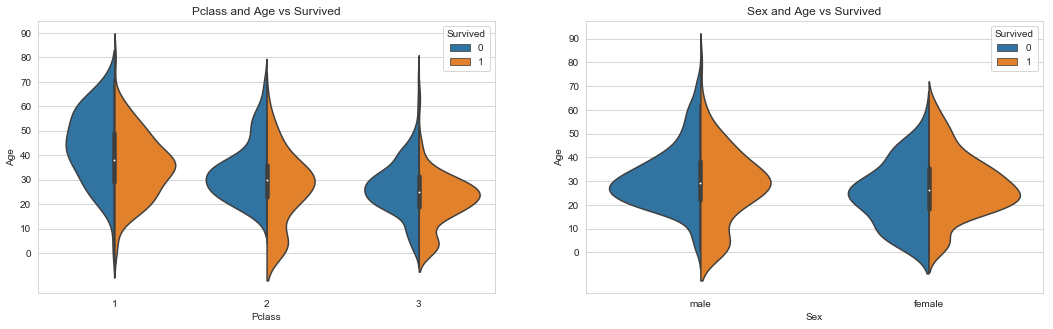

In [143]:
fig, ax = plt.subplots(1,2, figsize=(18,5))
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")

ax[1].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")

plt.show()

分析总体的年龄分布

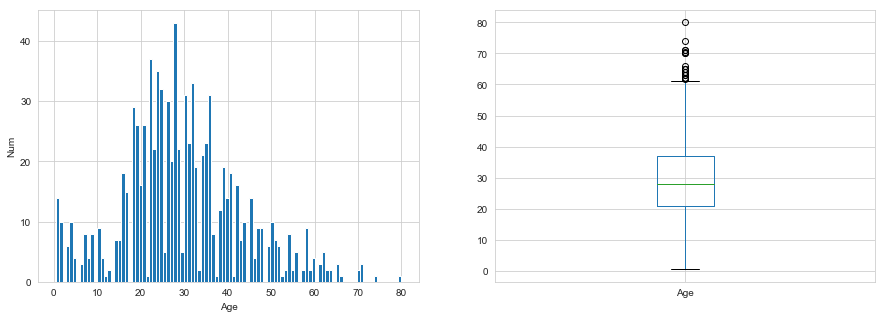

In [144]:
plt.figure(figsize=(15,5))
plt.subplot(121)
train_data["Age"].hist(bins=100)
plt.xlabel("Age")
plt.ylabel("Num")

plt.subplot(122)
train_data.boxplot(column="Age",showfliers=True)
plt.show()

不同年龄下的生存和非生存的分布情况

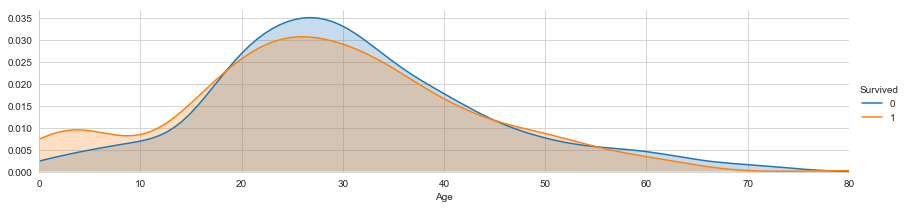

In [145]:
facet = sns.FacetGrid(train_data,hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0,train_data["Age"].max()))
facet.add_legend()

不同年龄下的平均生存率

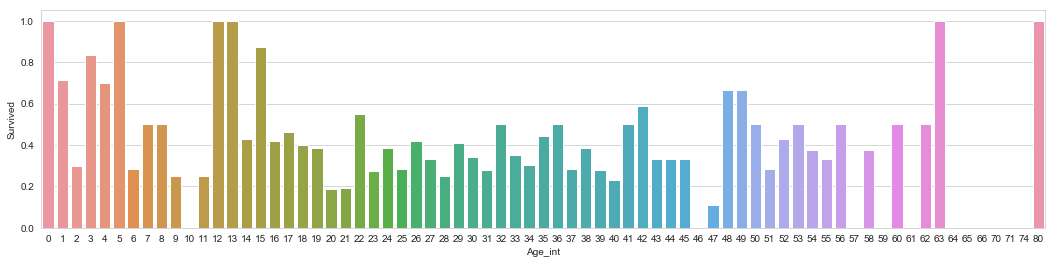

In [146]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data["Age_int"] = train_data["Age"].astype(int)
average_age = train_data[["Age_int","Survived"]].groupby(["Age_int"],as_index=False).mean()
sns.barplot(x="Age_int", y="Survived", data=average_age)

In [147]:
print(train_data["Age"].describe())

count    891.000000
mean      29.655032
std       13.740218
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


样本有891，平均年龄约为30岁，标准差13.5岁，最小年龄0.42，最大年龄80.
按照年龄，将乘客划分为儿童、少年、成年、老年，分析四个群体的生还情况：

In [148]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_int'],
      dtype='object')

In [149]:
bins = [0, 12, 18, 65, 100]
train_data["Age_group"] = pd.cut(train_data["Age"], bins)
train_data.shape

(891, 14)

In [150]:
train_data.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [151]:
train_data.Age_group.head()

0    (18, 65]
1    (18, 65]
2    (18, 65]
3    (18, 65]
4    (18, 65]
Name: Age_group, dtype: category
Categories (4, interval[int64]): [(0, 12] < (12, 18] < (18, 65] < (65, 100]]

In [152]:
by_age = train_data.groupby("Age_group")["Survived"].mean()
print(by_age)

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64


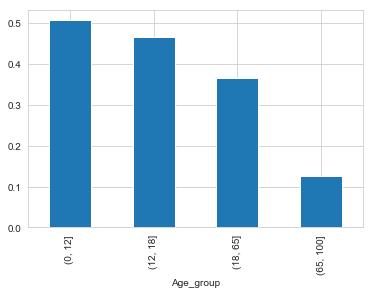

In [153]:
by_age.plot(kind="bar")


##  称呼， 名称和存活者之间的关系

通过观察名字数据，我们可以看出其中包括对乘客的称呼，如：Mr、Miss、Mrs等，称呼信息包含了乘客的年龄、性别，同时也包含了入社会地位等的称呼，如：Dr，Lady，Major（少校），Master（硕士，主人，师傅）等的称呼。

In [154]:
train_data["Title"] = train_data["Name"].str.extract("([A-Za-z]+)\.", expand=False)
pd.crosstab(train_data["Title"],train_data["Sex"])  # 透视表


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


观察不同的称呼与生存率之间的关系

In [155]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_int', 'Age_group',
       'Title'],
      dtype='object')

In [156]:
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Sir           1
Ms            1
Lady          1
Jonkheer      1
Countess      1
Capt          1
Mme           1
Name: Title, dtype: int64

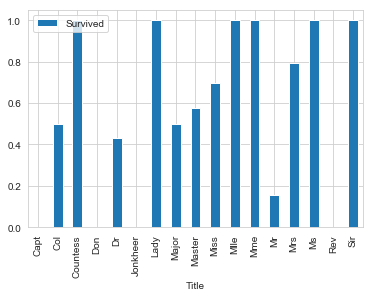

In [157]:
train_data[["Title","Survived"]].groupby(["Title"]).mean().plot.bar()

同时，对于名字，我们还可以观察名字长度和生存率之间存在关系的可能：

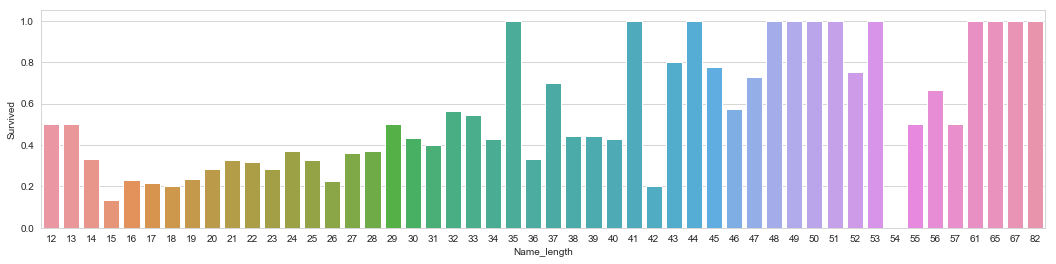

In [158]:
fig,axis1 = plt.subplots(1,1, figsize=(18,4))
train_data["Name_length"] = train_data["Name"].apply(len)
name_lengh = train_data[["Name_length","Survived"]].groupby(["Name_length"],as_index=False).mean()
sns.barplot(x="Name_length",y = "Survived",data=name_lengh)

## 有无兄弟姐妹之间的关系

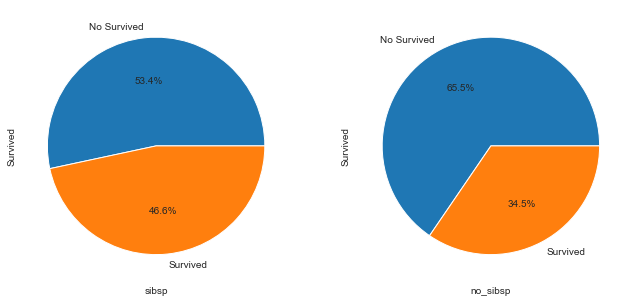

In [159]:
#  将数据分成 有兄弟姐妹和没有兄弟姐妹 的两组
sibsp_df = train_data[train_data["SibSp"] != 0]
no_sibsp_df = train_data[train_data["SibSp"] ==0 ]

plt.figure(figsize=(11,5))
plt.subplot(121)
sibsp_df["Survived"].value_counts().plot.pie(labels=["No Survived", "Survived"],autopct="%1.1f%%")
plt.xlabel("sibsp")

plt.subplot(122)
no_sibsp_df["Survived"].value_counts().plot.pie(labels=["No Survived", "Survived"],autopct="%1.1f%%")
plt.xlabel("no_sibsp")

plt.show()

##  有无父母子女 和 存活与否 的关系

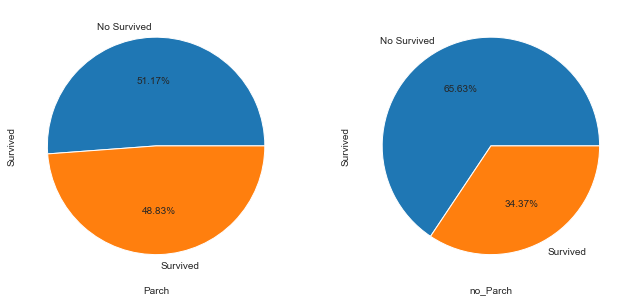

In [160]:
parch_df = train_data[train_data["Parch"] != 0]
no_parch_df = train_data[train_data["Parch"] == 0]

plt.figure(figsize=(11,5))
plt.subplot(121)
parch_df["Survived"].value_counts().plot.pie(labels=["No Survived","Survived"], autopct="%1.2f%%") 
plt.xlabel("Parch")

plt.subplot(122)
no_parch_df["Survived"].value_counts().plot.pie(labels=["No Survived","Survived"], autopct="%1.2f%%") 
plt.xlabel("no_Parch")
plt.show()

##  亲友和幸村者之间的关系

Text(0.5, 1.0, 'SibSp and Survived')

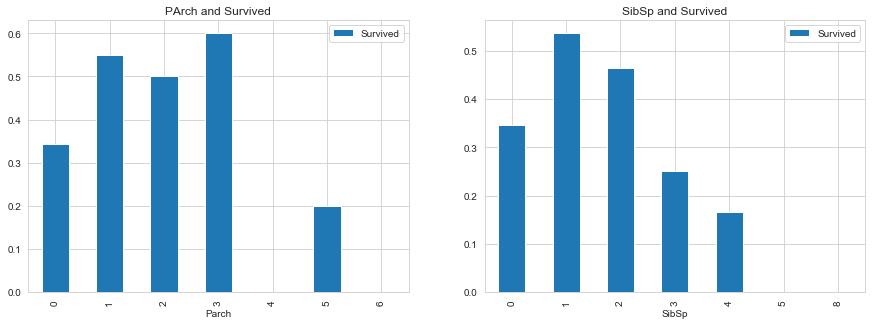

In [161]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
train_data[["Parch","Survived"]].groupby(["Parch"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("PArch and Survived")
train_data[["SibSp","Survived"]].groupby(["SibSp"]).mean().plot.bar(ax=ax[1])
ax[1].set_title("SibSp and Survived")

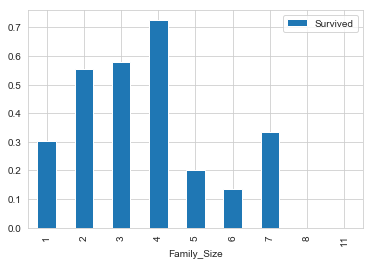

In [162]:
train_data["Family_Size"] = train_data["Parch"] + train_data["SibSp"] +1 
train_data[["Family_Size", "Survived"]].groupby(["Family_Size"]).mean().plot.bar()

从图表中可以看出，若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低。

## 票价分布与存活与否之间的关系

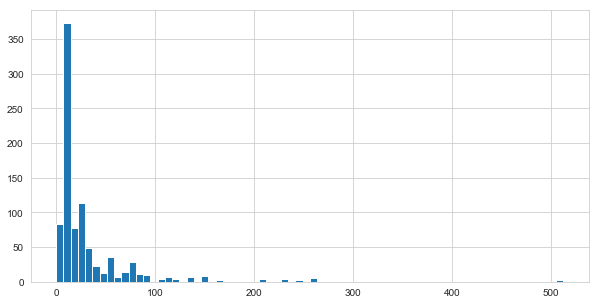

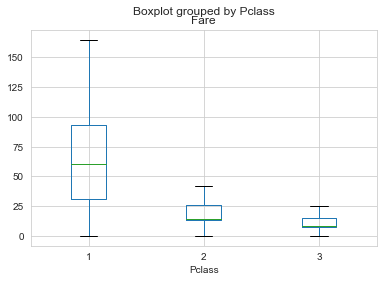

In [163]:
plt.figure(figsize=(10,5))
train_data["Fare"].hist(bins=70)

train_data.boxplot(column="Fare", by="Pclass", showfliers=False)
plt.show()

In [164]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

绘制生存与否与票价均值和方差的关系：

In [165]:
fare_not_survived = train_data["Fare"][train_data["Survived"] == 0]
fare_survived = train_data["Fare"][train_data["Survived"]==1]
fare_not_survived.head()

0     7.2500
4     8.0500
5     8.4583
6    51.8625
7    21.0750
Name: Fare, dtype: float64

In [166]:
# 注意这两者之间的区别

no_sibsp_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group,Title,Name_length
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]",Miss,22
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S,35,"(18, 65]",Mr,24
5,6,0,3,"Moran, Mr. James",male,24.478084,0,0,330877,8.4583,U0,Q,24,"(18, 65]",Mr,16
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,54,"(18, 65]",Mr,23
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S,27,"(18, 65]",Mrs,49


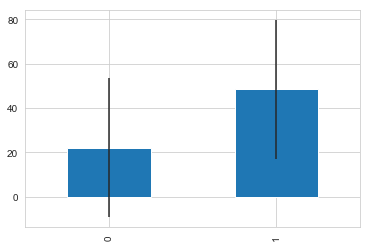

In [167]:
average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_not_survived.std()])
average_fare.plot(yerr=std_fare, kind="bar", legend=False)
plt.show()

由上图表可知，票价与是否生还有一定的相关性，生还者的平均票价要大于未生还者的平均票价。

##  船舱类型和存活与否之间的关系

由于船舱的缺失值确实太多，有效值仅仅有204个，很难分析出不同的船舱和存活的关系，所以在做特征工程的时候，可以直接将该组特征丢弃掉。 当然，这里我们也可以对其进行一下分析，对于缺失的数据都分为一类。 简单地将数据分为是否有Cabin记录作为特征，与生存与否进行分析：

In [168]:
train_data.loc[train_data.Cabin.isnull(), "Cabin"] = "U0"
train_data.Cabin.head()

0      U0
1     C85
2      U0
3    C123
4      U0
Name: Cabin, dtype: object

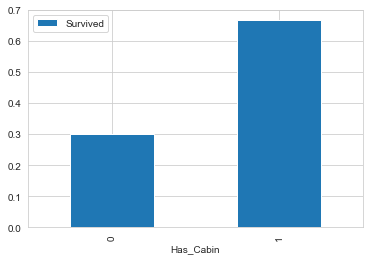

In [169]:
train_data["Has_Cabin"] = train_data["Cabin"].apply(lambda x: 0 if x == "U0" else 1)
train_data[["Has_Cabin","Survived"]].groupby(["Has_Cabin"]).mean().plot.bar()

对不同类型的船舱进行分析：

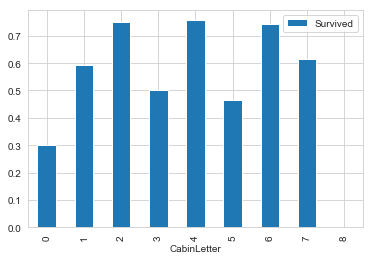

In [170]:
train_data["CabinLetter"] = train_data["Cabin"].map(lambda x : re.compile("([a-zA-Z+])").search(x).group())

train_data["CabinLetter"] = pd.factorize(train_data["CabinLetter"])[0]
train_data[["CabinLetter", "Survived"]].groupby(["CabinLetter"]).mean().plot.bar()

可见，不同的船舱生存率也有不同，但是差别不是很大。所以在处理中，我们可以直接将特征删除。

## 港口和存活与否的关系 Embarked

泰坦尼克号从英国的南安普顿港出发，途径法国瑟堡和爱尔兰昆士敦，那么在昆士敦之前上船的人，有可能在瑟堡或昆士敦下船，这些人将不会遇到海难。

Text(0.5, 1.0, 'Embarked and Survived')

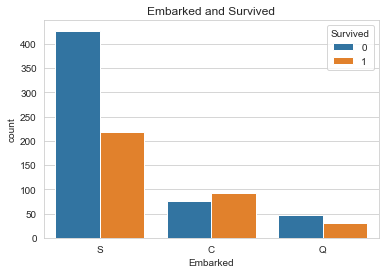

In [171]:
sns.countplot("Embarked", hue="Survived",data=train_data)
plt.title("Embarked and Survived")

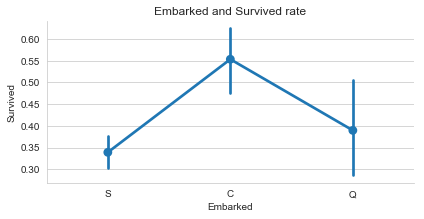

In [172]:
sns.factorplot("Embarked","Survived",data=train_data, size=3, aspect=2)
plt.title("Embarked and Survived rate")
plt.show()

由上可以看出，在不同的港口上船，生还率不同，C最高，Q次之，S最低。 以上为所给出的数据特征与生还与否的分析。 据了解，泰坦尼克号上共有2224名乘客。本训练数据只给出了891名乘客的信息，如果该数据集是从总共的2224人随机选出的，根据中心极限定理，该样本的数据量也足够大，那么我们的分析结果就具有代表性；但如果不是随机选取，那么我们的分析结果就可能不太靠谱了。

## 其他可能和存活与否有关系的特征

对于数据集中没有给出的特征信息，我们还可以联想其他可能会对模型产生影响的特征因素。如：乘客的国籍、乘客的身高、乘客的体重、乘客是否会游泳、乘客职业等等。
另外还有数据集中没有分析的几个特征：Ticket（船票号）、Cabin（船舱号），这些因素的不同可能会影响乘客在船中的位置从而影响逃生的顺序。但是船舱号数据缺失，船票号类别大，难以分析规律，所以在后期模型融合的时候，将这些因素交由模型来决定其重要性。

# 变量转换

变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric。 所以下面对数据的转换进行介绍，以在进行特征工程的时候使用。 所有的数据可以分为两类：
1.定性（Qualitative）变量可以以某种方式，Age就是一个很好的例子。
2.定量（Quantitative）变量描述了物体的某一（不能被数学表示的）方面，Embarked就是一个例子。

##  定向转换
## Dummy Variables

就是类别变量或者二元变量，当qualitative variable是一些频繁出现的几个独立变量时，Dummy Variables比较适用。我们以Embarked只包含三个值’S'，‘C'，’Q'，我们可以使用下面的代码将其转换为dummies：

In [173]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group,Title,Name_length,Family_Size,Has_Cabin,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,22,"(18, 65]",Mr,23,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,"(18, 65]",Mrs,51,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]",Miss,22,1,0,0


In [174]:
train_data.shape

(891, 19)

In [175]:
embarked_dummies = pd.get_dummies(train_data["Embarked"])
train_data = train_data.join(embarked_dummies)
train_data.drop(["Embarked"],axis=1, inplace=True)

embarked_dummies = train_data[["S","C","Q"]]
embarked_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [176]:
train_data.shape

(891, 21)

## Factoring

dummy不好处理Cabin（船舱号）这种标称属性，因为他出现的变量比较多。所以Pandas有一个方法叫做factorize()，它可以创建一些数字，来表示类别变量，对每一个类别映射一个ID，这种映射最后只生成一个特征，不像dummy那样生成多个特征。

In [177]:
train_data["Cabin"][train_data.Cabin.isnull()] = "U0"

train_data["CabinLetter"] = train_data["Cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_data["CabinLetter"] = pd.factorize(train_data["CabinLetter"])[0]
train_data[["Cabin", "CabinLetter"]].head()

,Cabin,CabinLetter
0,U0,0
1,C85,1
2,U0,0
3,C123,1
4,U0,0


## 定量（Quantitative）转换：
## Scalling

Scaling可以将一个很大范围的数值映射到一个很小范围（通常是 -1到1，或者是0到1），很多情况下我们需要将数值做Scaling使其范围大小一样，否则大范围数特征将会有更高的权重。比如：Age的范围可能只是0-100，而income的范围可能是0-10000000，在某些对数组大小敏感的模型中会影响其结果。

In [178]:
#  下面对 Age进行 Scalling
from sklearn import preprocessing
assert np.size(train_data["Age"]) == 891
scaler = preprocessing.StandardScaler()
train_data["Age_scaled"] = scaler.fit_transform(train_data["Age"].values.reshape(-1,1))

print(train_data["Age_scaled"].head())

0   -0.557439
1    0.607680
2   -0.266159
3    0.389220
4    0.389220
Name: Age_scaled, dtype: float64


## Binning

Binning通过观察“邻居”（即周围的值）将连续数据离散化。存储的值被分布到一些“桶”或“箱”中，就像直方图的bin将数据划分成几块一样。
下面的代码对Fare进行Binning。

In [179]:
train_data["Fare_bin"] = pd.qcut(train_data["Fare"],5)
print(train_data["Fare_bin"].head())

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]


在将数据Binning化后，要么将数据factorize化，要么dummies化。

In [180]:
train_data["Fare_bin"][2]

Interval(7.854, 10.5, closed='right')

In [181]:
# 先  factorize
train_data["Fare_bin_id"] = pd.factorize(train_data["Fare_bin"])[0]
# 然后在 dummies
fare_bin_dummies_df = pd.get_dummies(train_data["Fare_bin"]).rename(columns= lambda x:"Fare" + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

In [182]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,Age_scaled,Fare_bin,Fare_bin_id,"Fare(-0.001, 7.854]","Fare(7.854, 10.5]","Fare(10.5, 21.679]","Fare(21.679, 39.688]","Fare(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,-0.557439,"(-0.001, 7.854]",0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0.607680,"(39.688, 512.329]",1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,-0.266159,"(7.854, 10.5]",2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0.389220,"(39.688, 512.329]",1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0.389220,"(7.854, 10.5]",2,0,1,0,0,0


In [183]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

In [184]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Age_int', 'Age_group', 'Title',
       'Name_length', 'Family_Size', 'Has_Cabin', 'CabinLetter', 'C', 'Q', 'S',
       'Age_scaled', 'Fare_bin', 'Fare_bin_id', 'Fare(-0.001, 7.854]',
       'Fare(7.854, 10.5]', 'Fare(10.5, 21.679]', 'Fare(21.679, 39.688]',
       'Fare(39.688, 512.329]'],
      dtype='object')

# 特征工程

在进行特征工程的时候，我们不仅需要对训练数据进行处理，还需要同时将测试数据同训练数据一起处理，使得二者具有相同的数据类型和数据分布

In [185]:
train_df_org = pd.read_csv("Tick_train.csv")
test_df_org = pd.read_csv("Tick_test.csv")

test_df_org["Survived"] = 0
combined_train_test = train_df_org.append(test_df_org)   #891+418=1309rows, 12columns
PassengerID = test_df_org["PassengerId"]
combined_train_test.shape

(1309, 12)

对数据进行特征工程，也就是从各项参数中提取出对输出结果有或大或小的影响的特征，将这些特征作为训练模型的依据。一般来说，我们会先从含有缺失值的特征开始。

## EMbarked

因为“Embarked”项的缺失值不多，所以这里我们以众数来填充：

In [186]:
combined_train_test["Embarked"].isna().sum()

2

In [187]:
combined_train_test["Embarked"].mode()

0    S
dtype: object

In [188]:
combined_train_test["Embarked"].fillna(combined_train_test["Embarked"].mode().iloc[0], inplace=True)

对于三种不同的港口，由上面介绍的数值转换，我们知道可以有两种特征处理方式；dummy和factorizing。因为只有三个港口，所以我们可以直接用dummy来处理：

In [189]:
# 为了后面的特征分析， 这里我们将Embarked 特征进行 factorizing
combined_train_test["Embarked"] = pd.factorize(combined_train_test["Embarked"])[0]

# 使用 pd.get_dummies 获取  one-hot 编码
emb_dummies_df = pd.get_dummies(combined_train_test["Embarked"], prefix=combined_train_test[["Embarked"]].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

In [190]:
combined_train_test.columns


Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [191]:
combined_train_test.shape

(1309, 15)

##  Sex


对Sex也进行one-hot编码，也就是dummy处理：

In [192]:
pd.factorize(combined_train_test["Sex"])

(array([0, 1, 1, ..., 0, 0, 0], dtype=int64),
 Index(['male', 'female'], dtype='object'))

In [193]:
combined_train_test["Sex"] = pd.factorize(combined_train_test["Sex"])[0]

sex_dummies_df = pd.get_dummies(combined_train_test["Sex"], prefix=combined_train_test[["Sex"]].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

In [194]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1'],
      dtype='object')

In [195]:
combined_train_test.shape

(1309, 17)

##  Name

首先从名字中提取各种称呼

In [196]:
combined_train_test["Title"] = combined_train_test["Name"].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
combined_train_test["Title"] = combined_train_test["Title"].apply(lambda x:x.strip())


In [197]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title'],
      dtype='object')

In [198]:
combined_train_test.shape

(1309, 18)

将各式称呼进行统一化处理：

In [199]:

title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Male','Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
 
combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title'],
      dtype='object')

In [200]:
combined_train_test.shape

(1309, 18)

In [201]:
combined_train_test.Title.value_counts()

Mr         757
Miss       260
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

使用dummy对不同的称呼进行分列：

In [202]:
#为了后面的特征分析，这里我们也将Title特征进行factorizing
combined_train_test["Title"] = pd.factorize(combined_train_test["Title"])[0]
title_dummies_df = pd.get_dummies(combined_train_test["Title"], prefix=combined_train_test[["Title"]].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df], axis=1)
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5'],
      dtype='object')

In [203]:
combined_train_test.shape

(1309, 25)

增加名字的长度

In [204]:
combined_train_test["Name_length"] = combined_train_test["Name"].apply(len)
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length'],
      dtype='object')


## Fare

由前面分析可以知道，Fare项在测试数据中缺少一个值，所以需要对该值进行填充。我们按照一二三等舱各自的均价来填充：

下面transform将函数np.mean应用到各个group中。

In [205]:
combined_train_test["Fare"] = combined_train_test[["Fare"]].fillna(combined_train_test.groupby("Pclass").transform(np.mean))

In [206]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length'],
      dtype='object')

In [207]:
combined_train_test.shape

(1309, 26)

In [208]:
print(type(combined_train_test["Fare"]))
print(type(combined_train_test[["Fare"]]))
combined_train_test[["Fare"]][:2]

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,Fare
0,7.2500
1,71.2833


通过对Ticket数据的分析，我们可以看到部分票号数据有重复，同时结合亲属人数及名字的数据，和票价船舱等级对比，我们可以知道购买的票中有家庭票和团体票，所以我们需要将团体票的票价分配到每个人的头上。

In [209]:
combined_train_test["Group_Ticket"] = combined_train_test["Fare"].groupby(by=combined_train_test["Ticket"]).transform(
                                                                                    "count")
combined_train_test["Fare"] = combined_train_test["Fare"]/combined_train_test["Group_Ticket"]
combined_train_test.drop(["Group_Ticket"], axis=1, inplace=True)

combined_train_test.shape

(1309, 26)

使用 binning 给票价分等级

In [210]:
combined_train_test["Fare_bin"] = pd.qcut(combined_train_test["Fare"], 5)

对于 5 个票价 继续用 dummy 为票价等级分列

In [211]:
combined_train_test["Fare_bin"] = pd.qcut(combined_train_test["Fare"],5)
combined_train_test.shape

(1309, 27)

In [212]:
combined_train_test["Fare_bin_id"] = pd.factorize(combined_train_test["Fare_bin"])[0]

fare_bin_dummies_df = pd.get_dummies(combined_train_test["Fare_bin_id"]).rename(columns=lambda x:"Fare_" + str(x))
combined_train_test = pd.concat([combined_train_test, fare_bin_dummies_df], axis=1)
combined_train_test.drop(["Fare_bin"], axis=1, inplace=True)

In [213]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length', 'Fare_bin_id', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Fare_4'],
      dtype='object')

In [214]:
combined_train_test.shape


(1309, 32)

## Pclass


Pclass这一项，其实已经可以不用继续处理了，我们只需将其转换为dummy形式即可。 但是为了更好的分析，我们这里假设对于不同等级的船舱，各船舱内部的票价也说明了各等级舱的位置，那么也就很有可能与逃生的顺序有关系。所以这里分析出每等舱里的高价和低价位。

In [215]:
combined_train_test["Fare"].groupby(by=combined_train_test["Pclass"]).mean()

Pclass
1    33.910500
2    11.411010
3     7.337571
Name: Fare, dtype: float64

In [216]:
from sklearn.preprocessing import LabelEncoder

# 建立 Pclass Fare category
def pclass_fare_category(df, pclass_1_mean_fare,pclass_2_mean_fare,pclass_3_mean_fare):
    if df["Pclass"] == 1:
        if df["Fare"] <= pclass_1_mean_fare:
            return "Pclass1_Low"
        else:
            return "Pclass1_High"
    elif df["Pclass"] == 2:
        if df["Fare"] <= pclass_2_mean_fare:
            return "Pclass2_Low"
        else:
            return "Pclass2_High"
    elif df["Pclass"] == 3:
        if df["Fare"] <= pclass_3_mean_fare:
            return "Pclass3_Low"
        else:
            return "Pclass3_High"
Pclass1_mean_fare = combined_train_test["Fare"].groupby(by=combined_train_test["Pclass"]).mean().get(1)
Pclass2_mean_fare = combined_train_test["Fare"].groupby(by=combined_train_test["Pclass"]).mean().get(2)
Pclass3_mean_fare = combined_train_test["Fare"].groupby(by=combined_train_test["Pclass"]).mean().get(3)
#
#  建立pclass_Fare_Category
combined_train_test["Pclass_Fare_Category"] = combined_train_test.apply(pclass_fare_category,args=(Pclass1_mean_fare,
                                                        Pclass2_mean_fare, Pclass3_mean_fare),axis=1)
pclass_level = LabelEncoder()

#  给每一项添加标签
pclass_level.fit(np.array(["Pclass1_Low","Pclass1_High","Pclass2_Low","Pclass2_High","Pclass3_Low","Pclass3_High"]))
# 转化成数值
combined_train_test["Pclass_Fare_Category"] = pclass_level.transform(combined_train_test["Pclass_Fare_Category"])

# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test["Pclass_Fare_Category"]).rename(columns=lambda x: "Pclass_" +
                                                                                      str(x))
combined_train_test = pd.concat([combined_train_test, pclass_dummies_df], axis=1)


combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length', 'Fare_bin_id', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Fare_4', 'Pclass_Fare_Category', 'Pclass_0', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Pclass_4', 'Pclass_5'],
      dtype='object')

In [217]:
combined_train_test.shape

(1309, 39)

同时，我们将Pclass特征factorize化：

## Parch and SibSp

由前面的分析，我们可以知道，亲友的数量没有或者太多会影响到Survived。所以将二者合并为FamliySize这一组合项，同时也保留这两项。

In [218]:
def family_size_category(family_size):
    if family_size > 1:
        return "Single"
    elif family_size <= 4:
        return "Samll_Family"
    else:
        return "Large_Family"
    
    
combined_train_test["Family_Size"] = combined_train_test["Parch"] + combined_train_test["SibSp"] +1 
combined_train_test["Family_Size_Category"] = combined_train_test["Family_Size"].map(family_size_category)
le_family = LabelEncoder()
le_family.fit(np.array(["Single","Samll_Family","Large_Family"]))
combined_train_test["Family_Size_Category"] = le_family.transform(combined_train_test["Family_Size_Category"])

family_size_dummies_df = pd.get_dummies(combined_train_test["Family_Size_Category"],
                                       prefix=combined_train_test[["Family_Size_Category"]].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

combined_train_test.shape

(1309, 43)

In [219]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length', 'Fare_bin_id', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Fare_4', 'Pclass_Fare_Category', 'Pclass_0', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Pclass_4', 'Pclass_5', 'Family_Size',
       'Family_Size_Category', 'Family_Size_Category_1',
       'Family_Size_Category_2'],
      dtype='object')

##  Age

因为Age项的缺失值较多，所以不能直接填充age的众数或者平均数。

常见的有两种对年龄的填充方式：一种是根据Title中的称呼，如Mr，Master、Miss等称呼不同类别的人的平均年龄来填充；一种是综合几项如Sex、Title、Pclass等其他没有缺失值的项，使用机器学习算法来预测Age。

这里我们使用后者来处理。以Age为目标值，将Age完整的项作为训练集，将Age缺失的项作为测试集。


建立Age的预测模型，我们可以多模型预测，然后再做模型的融合，提高预测的精度。

In [220]:
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

missing_age_test.head(10)
missing_age_test.shape

(263, 10)

In [224]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(["Age"], axis=1)
    missing_age_Y_train = missing_age_train["Age"]
    missing_age_X_test = missing_age_test.drop(["Age"],axis=1)
    
    # model1 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {"n_estimators":[2000],
                         "max_depth":[4],
                         "learning_rate":[0.01],
                         "max_features":[3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10,
                                               n_jobs=25, verbose=1,scoring="neg_mean_squared_error")
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print("Age feature Best GB Params:" + str(gbm_reg_grid.best_params_))
    print("Age feature Best GB Score:" + str(gbm_reg_grid.best_score_))
    print("Age feature Best GB Params: " + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])
#     missing_age_test.loc[:,"Age_GB"] = gbm_reg_grid.predict(missing_age_X_test)
#     print(missing_age_test["Age_GB"][:4])
          
    # modeL2  rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {"n_estimators":[200],
                        "max_depth":[5],
                        "random_state":[0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10,
                                              n_jobs=25, verbose=1, scoring="neg_mean_squared_error")
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print("Age feature Best RF Params:" + str(rf_reg_grid.best_params_))
    print("Age feature Best Rf Score:" + str(rf_reg_grid.best_score_))
    print("Age feature Best RF Params: " + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    
    missing_age_test.loc[:,"Age_RF"] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test["Age_RF"][:4])
    
    
    #  two models merge
    print("shape1",missing_age_test["Age"].shape, missing_age_test[["Age_GB","Age_RF"]].mode(axis=1).shape)
    
    missing_age_test.loc[:, "Age"] = np.mean([missing_age_test["Age_GB"], missing_age_test["Age_RF"]])
    print(missing_age_test["Age"][:4])
    
    missing_age_test.drop(["Age_GB","Age_RF"],axis=1, inplace=True)
    
    return missing_age_test
 

In [225]:
combined_train_test.loc[(combined_train_test.Age.isnull()),"Age"] = fill_missing_age(missing_age_train,
                                                                                     missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    1.2s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-129.00559102179122
Age feature Best GB Params: -65.70016037658236
5     37.400629
17    31.886961
19    32.979941
26    28.351985
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    0.4s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best Rf Score:-119.84698546687665
Age feature Best RF Params: -97.06328858883364
5     33.519873
17    33.126990
19    34.755821
26    28.141864
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     29.963739
17    29.963739
19    29.963739
26    29.963739
Name: Age, dtype: float64


In [226]:
missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,29.963739,2,0,0,16,1,1,8.4583,2,3
17,29.963739,0,0,0,28,1,1,13.0000,3,2
19,29.963739,1,1,1,23,1,1,7.2250,4,3
26,29.963739,1,0,0,23,1,1,7.2250,4,3
28,29.963739,2,1,2,29,1,1,7.8792,0,3


##  Ticket

观察Ticket的值，我们可以看到，Ticket有字母和数字之分，而对于不同的字母，可能在很大程度上就意味着船舱等级或者不同船舱的位置，也会对Survived产生一定的影响，所以我们将Ticket中的字母分开，为数字的部分则分为一类。

In [227]:
combined_train_test["Ticket_Letter"] = combined_train_test["Ticket"].str.split().str[0]
combined_train_test["Ticket_Letter"] = combined_train_test["Ticket_Letter"].apply(lambda x: "U0" if x.isnumeric()
                                                                                 else x)
# 如果要提取数字信息，则也可以这样做，现在我们对数字票单纯地分为一类。
# combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# combined_train_test['Ticket_Number'].fillna(0, inplace=True)

#   将 Ticket_Letter factorize

combined_train_test["Ticket_Letter"] = pd.factorize(combined_train_test["Ticket_Letter"])[0]


 ## Cabin

因为Cabin项的缺失值确实太多了，我们很难对其进行分析，或者预测。所以这里我们可以直接将Cabin这一项特征去除。但通过上面的分析，可以知道，该特征信息的有无也与生存率有一定的关系，所以这里我们暂时保留该特征，并将其分为有和无两类。

In [228]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), "Cabin"] = "U0"
combined_train_test["Cabin"] = combined_train_test["Cabin"].apply(lambda x: 0 if x== "U0" else 1)


In [229]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length', 'Fare_bin_id', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Fare_4', 'Pclass_Fare_Category', 'Pclass_0', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Pclass_4', 'Pclass_5', 'Family_Size',
       'Family_Size_Category', 'Family_Size_Category_1',
       'Family_Size_Category_2', 'Ticket_Letter'],
      dtype='object')

In [230]:
combined_train_test.shape

(1309, 44)

##  特征之间的相关性分析

我们挑选一些主要的特征，生成特征之间的关联图，查看特征与特征之间的相关性：

In [231]:
# 筛选出 新的 DataFrame
Correlation = pd.DataFrame(combined_train_test[['Embarked','Sex','Title','Name_length','Family_Size',
                                                'Family_Size_Category','Fare','Fare_bin_id','Pclass',
                                                'Pclass_Fare_Category','Age','Ticket_Letter','Cabin']])

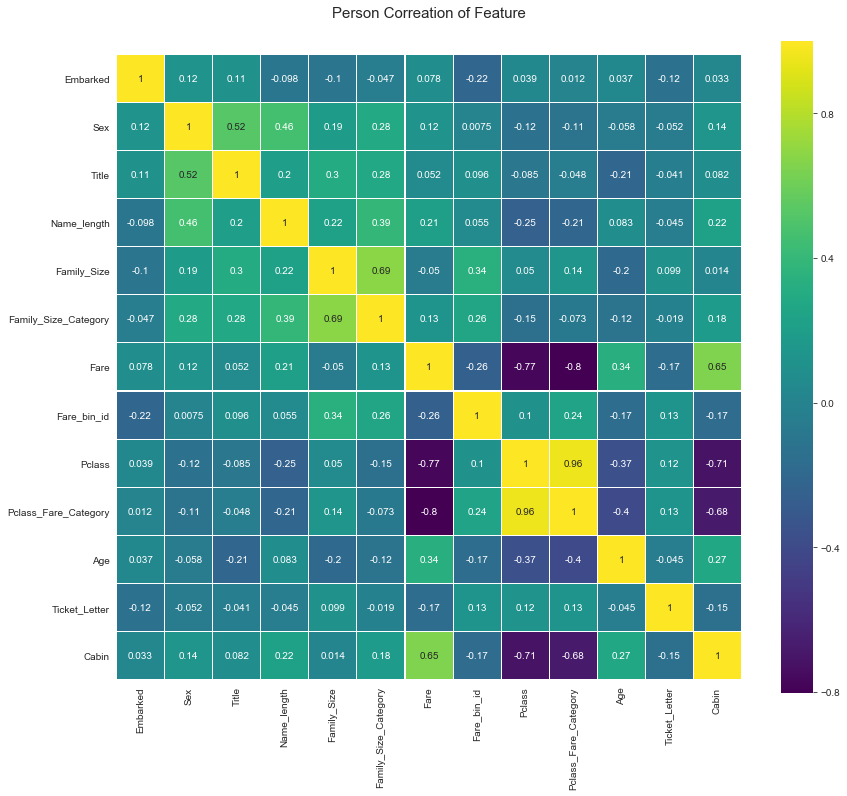

In [233]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title("Person Correation of Feature", y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(), linewidths=0.1,vmax=1.0, square=True, cmap=colormap,
           linecolor="white", annot=True)

##   特征之间的数据分布

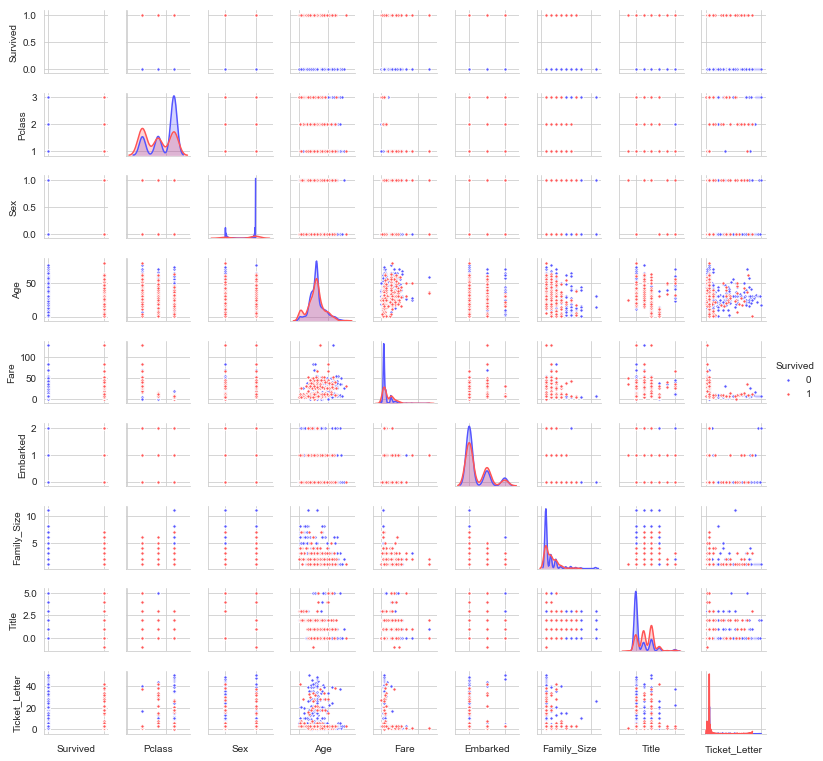

In [235]:
g = sns.pairplot(combined_train_test[[u"Survived",u"Pclass",u"Sex",u"Age",u"Fare",u"Embarked",
                                     u"Family_Size",u"Title",u"Ticket_Letter"]],hue="Survived",
                palette="seismic",size=1.2, diag_kind="kde",diag_kws=dict(shade=True), plot_kws=dict(s=10))
g.set(xticklabels=[])

##  输入模型前的一些处理

###  一些数据的正则化，这里我们将 Age 和 fare  进行正则化

In [236]:
from sklearn import preprocessing
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[["Age","Fare","Name_length"]])
combined_train_test[["Age","Fare","Name_length"]] = scale_age_fare.transform(combined_train_test[["Age","Fare",
                                                                                                 "Name_length"]])


###  丢弃掉  无用的特征

对于上面的特征工程中，我们从一些原始的特征中提取出了很多要融合到模型中的特征，但是我们需要剔除那些原本的我们用不到的或者非数值特征： 首先对我们的数据先进行一下备份，以便后期的再次分析

In [238]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length', 'Fare_bin_id', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Fare_4', 'Pclass_Fare_Category', 'Pclass_0', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Pclass_4', 'Pclass_5', 'Family_Size',
       'Family_Size_Category', 'Family_Size_Category_1',
       'Family_Size_Category_2', 'Ticket_Letter'],
      dtype='object')

In [242]:
combined_train_test.shape

(1309, 34)

In [240]:
combined_data_backup = combined_train_test
combined_train_test.drop(["PassengerId","Embarked","Sex","Name",
                         "Fare_bin_id","Pclass_Fare_Category", "Parch","SibSp","Family_Size_Category",
                         "Ticket"], axis=1,inplace=True)

KeyError: "['PassengerId' 'Embarked' 'Sex' 'Name' 'Fare_bin_id'\n 'Pclass_Fare_Category' 'Parch' 'SibSp' 'Family_Size_Category' 'Ticket'] not found in axis"

In [241]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Fare', 'Pclass', 'Survived', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title_-1',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Name_length', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4',
       'Pclass_0', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Pclass_4', 'Pclass_5',
       'Family_Size', 'Family_Size_Category_1', 'Family_Size_Category_2',
       'Ticket_Letter'],
      dtype='object')

In [243]:
combined_train_test.shape

(1309, 34)

###  将训练数据和测试数据 分开

In [244]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(["Survived"], axis=1)
titanic_train_data_Y = train_data["Survived"]

titanic_test_data_X = test_data.drop(["Survived"],axis=1)
titanic_train_data_X.shape

(891, 33)

In [245]:
titanic_train_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 33 columns):
Age                       891 non-null float64
Cabin                     891 non-null int64
Fare                      891 non-null float64
Pclass                    891 non-null int64
Embarked_0                891 non-null uint8
Embarked_1                891 non-null uint8
Embarked_2                891 non-null uint8
Sex_0                     891 non-null uint8
Sex_1                     891 non-null uint8
Title                     891 non-null int64
Title_-1                  891 non-null uint8
Title_0                   891 non-null uint8
Title_1                   891 non-null uint8
Title_2                   891 non-null uint8
Title_3                   891 non-null uint8
Title_4                   891 non-null uint8
Title_5                   891 non-null uint8
Name_length               891 non-null float64
Fare_0                    891 non-null uint8
Fare_1                    891 non-

# 模型融合及测试

## 利用不同的模型来对特征进行筛选，选出较为重要的特征：

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):
    
    # Randomforest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {"n_estimators":[500],
                    "min_samples_split":[2,3],
                    "max_depth":[20]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25,cv=10,verbose=1)
    rf_grid.fit(titanic_test_data_X, titanic_train_data_Y)
    print("Top N Features Best Rf Params:" + str(rf_grid.best_params_))
    print("Top N Features Best Rf Scores:" + str(rf_grid.best_score_))
    print("Top N Features Best Rf Train Score:" + str(rf_grid.score(titanic_train_data_X,
                                                                   titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),
        'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)["feature"]
    print("Sample 10 Features from RF Classifier")
    print(str(feature_imp_sorted_rf[:10]))
    
     #AdaBoost
    ada_est = AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=25,cv=10,verbose=1)
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),
                                           'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Features from Ada Classifier:')
    print(str(features_top_n_ada[:10]))
    
    #ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators':[500],'min_samples_split':[3,4],'max_depth':[20]}
    et_grid = model_selection.GridSearchCV(et_est,et_param_grid,n_jobs=25,cv=10,verbose=1)
    et_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best DT Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':et_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est = GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1],'max_depth':[20]}
    gb_grid = model_selection.GridSearchCV(gb_est,gb_param_grid,n_jobs=25,cv=10,verbose=1)
    gb_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':gb_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
    dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=25,cv=10,verbose=1)
    dt_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    #  merge 合并这三个模型
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et,features_top_n_gb,
                               features_top_n_dt],ignore_index=True).drop_duplicates()
    features_importance = pd.concat([feature_imp_sorted_rf, feature_imp_sorted_ada,feature_imp_sorted_et,
                                    feature_imp_sorted_gb, feature_imp_sorted_dt], ignore_index=True)
    return features_top_n, features_importance

## 依据我们筛选出的特征构建训练集和测试集¶

但如果在进行特征工程的过程中，产生了大量的特征，而特征与特征之间会存在一定的相关性。太多的特征一方面会影响训练的速度，另一方面也可能会使得模型过拟合。所以在特征太多的情况下，我们可以利用不同的模型对特征进行筛选，选取我们想要的前n个特征。

In [252]:
titanic_train_data_X.shape

(891, 33)

In [253]:
titanic_train_data_Y.shape

(891,)

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    
    #randomforest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators':[500],'min_samples_split':[2,3],'max_depth':[20]}
    rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs=25,cv=10,verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Feeatures from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    #AdaBoost
    ada_est = AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=25,cv=10,verbose=1)
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),
                                           'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Features from Ada Classifier:')
    print(str(features_top_n_ada[:10]))
    
    #ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators':[500],'min_samples_split':[3,4],'max_depth':[20]}
    et_grid = model_selection.GridSearchCV(et_est,et_param_grid,n_jobs=25,cv=10,verbose=1)
    et_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best DT Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':et_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est = GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1],'max_depth':[20]}
    gb_grid = model_selection.GridSearchCV(gb_est,gb_param_grid,n_jobs=25,cv=10,verbose=1)
    gb_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':gb_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
    dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=25,cv=10,verbose=1)
    dt_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf,features_top_n_ada,features_top_n_et,features_top_n_gb,features_top_n_dt],
                              ignore_index=True).drop_duplicates()
    features_importance = pd.concat([feature_imp_sorted_rf,feature_imp_sorted_ada,feature_imp_sorted_et,
                                     feature_imp_sorted_gb,feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n,features_importance


In [255]:
feature_to_pick = 30
feature_top_n,feature_importance = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   28.2s remaining:   15.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   32.9s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8282828282828283
Top N Features RF Train Score:0.978675645342312
Sample 10 Feeatures from RF Classifier
17      Name_length
0               Age
2              Fare
7             Sex_0
9             Title
11          Title_0
8             Sex_1
29      Family_Size
3            Pclass
32    Ticket_Letter
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    8.3s finished


Top N Features Best Ada Params:{'learning_rate': 0.01, 'n_estimators': 500}
Top N Features Best Ada Score:0.8159371492704826
Top N Features Ada Train Score:0.8204264870931538
Sample 10 Features from Ada Classifier:
11        Title_0
29    Family_Size
2            Fare
7           Sex_0
3          Pclass
1           Cabin
8           Sex_1
17    Name_length
0             Age
9           Title
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    2.3s remaining:    1.2s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    2.4s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best DT Score:0.8237934904601572
Top N Features ET Train Score:0.9753086419753086
Sample 10 Features from ET Classifier:
11          Title_0
7             Sex_0
8             Sex_1
17      Name_length
0               Age
2              Fare
29      Family_Size
3            Pclass
1             Cabin
32    Ticket_Letter
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    8.8s remaining:    4.7s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   10.9s finished


Top N Features Best GB Params:{'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7822671156004489
Top N Features GB Train Score:0.9966329966329966
Sample 10 Feature from GB Classifier:
11          Title_0
0               Age
2              Fare
17      Name_length
29      Family_Size
28         Pclass_5
3            Pclass
9             Title
32    Ticket_Letter
16          Title_5
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Top N Features Bset DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.7845117845117845
Top N Features DT Train Score:0.9618406285072951
Sample 10 Features from DT Classifier:
11          Title_0
2              Fare
0               Age
17      Name_length
29      Family_Size
16          Title_5
28         Pclass_5
3            Pclass
32    Ticket_Letter
1             Cabin
Name: feature, dtype: object


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.0s finished


用 视图 可视化 不同算法刷选的特征排序

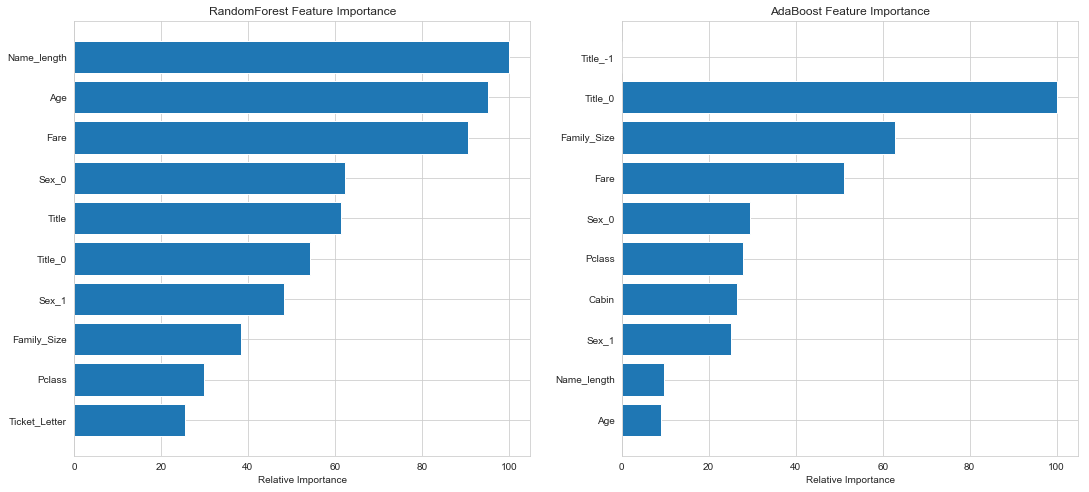

In [256]:
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')

plt.show()

## 模型融合

常见的模型融合方法有：Bagging、Boosting、Stacking、Blending。

### Bagging

Bagging将多个模型，也就是基学习器的预测结果进行简单的加权平均或者投票。它的好处是可以并行地训练基学习器。Random Forest就用到了Bagging的思想。

### Boosting

Boosting的思想有点像知错能改，每个基学习器是在上一个基学习器学习的基础上，对上一个基学习器的错误进行弥补。我们将会用到的AdaBoost，Gradient Boost就用到了这种思想。

### Stacking

Stacking是用新的次学习器去学习如何组合上一层的基学习器。如果把Bagging看作是多个基分类器的线性组合，那么Stacking就是多个基分类器的非线性组合。Stacking可以将学习器一层一层地堆砌起来，形成一个网状的结构。 相比来说Stacking的融合框架相对前面二者来说在精度上确实有一定的提升，所以在下面的模型融合上，我们也使用Stacking方法。

### Blending

Blending和Stacking很相似，但同时它可以防止信息泄露的问题。


Stacking框架融合：这里我们使用了两层的模型融合

Level 1使用了：Random Forest、AdaBoost、ExtraTrees、GBDT、Decision Tree、KNN、SVM，一共7个模型

Level 2使用了XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测。

Level 1：

Stacking框架是堆叠使用基础分类器的预测作为对二级模型的训练的输入。然而，我们不能简单地在全部训练数据上训练基本模型，产生预测，输出用于第二层的训练。如果我们在Train Data上训练，然后在Train Data上预测，就会造成标签。为了避免标签，我们需要对每个基学习器使用K-fold，将Kge模型对Valid Set的预测结果拼起来，作为下一层学习器的输入。

所以这里我们建立输出fold预测方法：

In [259]:
from sklearn.model_selection import KFold
 
# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0 #for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS,random_state=SEED,shuffle=False)
 
def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i, (train_index,test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr,y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
rf = RandomForestClassifier(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
 
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
 
et = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,max_depth=8,min_samples_leaf=2,verbose=0)
 
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,max_depth=5,verbose=0)
 
dt = DecisionTreeClassifier(max_depth=8)
knn = KNeighborsClassifier(n_neighbors=2)
 
svm = SVC(kernel='linear',C=0.025)


将pandas转换为arrays：

In [263]:
# Create Numpy arrays of train,test and target(Survived) dataframes to feed into our models
x_train = titanic_train_data_X.values   #Creates an array of the train data
x_test = titanic_test_data_X.values   #Creates an array of the test data
y_train = titanic_train_data_Y.values


In [264]:
# Create our OOF train and test predictions.These base result will be used as new featurs
rf_oof_train,rf_oof_test = get_out_fold(rf,x_train,y_train,x_test)  # Random Forest
ada_oof_train,ada_oof_test = get_out_fold(ada,x_train,y_train,x_test)  # AdaBoost
et_oof_train,et_oof_test = get_out_fold(et,x_train,y_train,x_test)  # Extra Trees
gb_oof_train,gb_oof_test = get_out_fold(gb,x_train,y_train,x_test)  # Gradient Boost
dt_oof_train,dt_oof_test = get_out_fold(dt,x_train,y_train,x_test)  #Decision Tree
knn_oof_train,knn_oof_test = get_out_fold(knn,x_train,y_train,x_test)  # KNeighbors
svm_oof_train,svm_oof_test = get_out_fold(svm,x_train,y_train,x_test)  # Support Vector
 
print("Training is complete")

Training is complete


预测并生成提交文件

Level 2：我们利用XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测。

In [265]:
x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train,dt_oof_train,knn_oof_train,svm_oof_train),axis=1)
x_test =np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test,dt_oof_test,knn_oof_test,svm_oof_test),axis=1)


In [266]:
from xgboost import XGBClassifier
 
gbm = XGBClassifier(n_estimators=200,max_depth=4,min_child_weight=2,gamma=0.9,subsample=0.8,
                    colsample_bytree=0.8,objective='binary:logistic',nthread=-1,scale_pos_weight=1).fit(x_train,y_train)
predictions = gbm.predict(x_test)

In [267]:
StackingSubmission = pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')

NameError: name 'PassengerId' is not defined

# 学习曲线

In [270]:
from sklearn.model_selection import learning_curve
 
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                        n_jobs=1,train_sizes=np.linspace(.1,1.0,5),verbose=0):
    """
    Generate a simple plot of the test and training learning curve.
    
    Parameters
    -------------
    estimator:object type that implents the "fit" and "predict" methods
    An object of that type which is cloned for each validation.
    
    title:string
    Title for the chart.
    
    X:array-like,shape(n_samples,n_features)
    Training vector,where n_samples is the number of samples and n_features is 
    the number of features.
    
    y:array-like,shape(n_samples) or (n_samples,n_features),optional
    Target relative to X for classification or regression;
    None for unsupervised learning.
    
    ylim:tuple,shape(ymin,ymax),optional
    Defines minimum and maximum yvalues plotted.
    
    cv:integer,cross-validation generator,optional
    If an integer is passed,it is the number of folds(defaults to 3).
    Specific cross-validation objects can be passed,see
    sklearn.cross_validation module for the list of possible objects
    
    n_jobs:integer,optional
    Number of jobs to run in parallel(default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,
                                                          n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color="g",label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

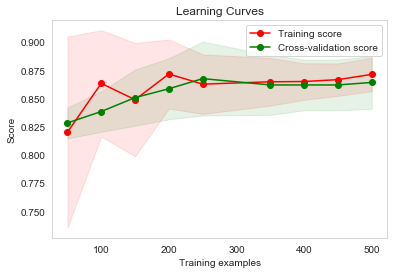

In [271]:
X = x_train
Y = y_train
 
# RandomForest
rf_parameters = {'n_jobs':-1,'n_estimators':500,'warm_start':True,'max_depth':6,
                 'min_samples_leaf':2,'max_features':'sqrt','verbose':0}
 
# AdaBoost
ada_parameters = {'n_estimators':500,'learning_rate':0.1}
 
# ExtraTrees
et_parameters = {'n_jobs':-1,'n_estimators':500,'max_depth':8,'min_samples_leaf':2,'verbose':0}
 
# GradientBoosting
gb_parameters = {'n_estimators':500,'max_depth':5,'min_samples_leaf':2,'verbose':0}
 
# DecisionTree
dt_parameters = {'max_depth':8}
 
# KNeighbors
knn_parameters = {'n_neighbors':2}
 
# SVM
svm_parameters = {'kernel':'linear','C':0.025}
 
# XGB
gbm_parameters = {'n_estimators':2000,'max_depth':4,'min_child_weight':2,'gamma':0.9,'subsample':0.8,
                  'colsample_bytree':0.8,'objective':'binary:logistic','nthread':-1,'scale_pos_weight':1}

title = "Learning Curves"
plot_learning_curve(RandomForestClassifier(**rf_parameters),title,X,Y,cv=None,n_jobs=4,
                    train_sizes=[50,100,150,200,250,350,400,450,500])
plt.show()
